Au debut, On importe la base de donnée qu'on va utiliser

In [4]:
# importer pandas ,numpy et datetime et mettre les data dans un dataframe df

import pandas as pd

import numpy as np

import datetime as dt

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

from sklearn import svm,model_selection,preprocessing

from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score ,StratifiedKFold

import shap

df=pd.read_csv("data.csv")

In [5]:


df['Date']= pd.to_datetime(df['Date'])

df['Day']=df['Date'].apply(lambda time: time.dayofweek)

df['Month']=df['Date'].apply(lambda time: time.month)

df1= df[df['Date']>dt.datetime(1997, 5, 19)]
df1

,Date,NASDAQ_Open,NASDAQ_High,NASDAQ_Low,NASDAQ_Close,NASDAQ_Adj_Close,NASDAQ_Volume,NYSE_Open,NYSE_High,NYSE_Low,...,Amazon_Adj_Close,Amazon_Volume,Facebook_Open,Facebook_High,Facebook_Low,Facebook_Close,Facebook_Adj_Close,Facebook_Volume,Day,Month
6643,1997-05-20,1342.170044,1363.890015,1338.420044,1363.880005,1363.880005,531940000,4622.839844,4622.839844,4622.839844,...,1.635417,5467200.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,5
6644,1997-05-21,1373.150024,1380.900024,1373.150024,1373.750000,1373.750000,654890000,4612.370117,4612.370117,4612.370117,...,1.427083,18853200.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2,5
6645,1997-05-22,1376.180054,1378.260010,1366.760010,1372.599976,1372.599976,551360000,4595.979980,4595.979980,4595.979980,...,1.395833,11776800.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3,5
6646,1997-05-23,1377.729980,1389.750000,1377.729980,1389.719971,1389.719971,539440000,4655.399902,4655.399902,4655.399902,...,1.500000,15937200.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4,5
6647,1997-05-27,1388.000000,1409.390015,1386.829956,1409.209961,1409.209961,634040000,4659.529785,4659.529785,4659.529785,...,1.583333,8697600.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,2021-10-28,15304.740234,15452.299805,15290.309570,15448.120117,15448.120117,5660240000,16920.380859,17077.519531,16920.380859,...,3446.570068,5708700.0,312.989990,325.519989,308.109985,316.920013,316.920013,50806800.0,3,10
12796,2021-10-29,15323.290039,15504.120117,15323.290039,15498.389648,15498.389648,5310370000,17077.000000,17077.000000,16977.490234,...,3372.429932,6469500.0,320.190002,326.000000,319.600006,323.570007,323.570007,37059400.0,4,10
12797,2021-11-01,15541.259766,15598.950195,15470.820313,15595.919922,15595.919922,5239250000,17016.410156,17138.380859,17016.410156,...,3318.110107,3608900.0,326.040009,333.450012,326.000000,329.980011,329.980011,31518900.0,0,11
12798,2021-11-02,15583.980469,15656.599609,15569.269531,15649.599609,15649.599609,5118540000,17131.080078,17131.080078,17078.810547,...,3312.750000,2627600.0,331.380005,334.790009,323.799988,328.079987,328.079987,28353000.0,1,11


In [6]:
#ajouter 4 coulonnes ou on calcule les gains par jours pour Apple , Google , Amazon, Pfizer

df1['Apple_Net_gain']= (df1.Apple_Close-df1.Apple_Open)/df1.Apple_Open

df1['Google_Net_gain']= (df1.Google_Close-df1.Google_Open)/df1.Google_Open

df1['Amazon_Net_gain']= (df1.Amazon_Close-df1.Amazon_Open)/df1.Amazon_Open

df1['Pfizer_Net_gain']= (df1.Pfizer_Close-df1.Pfizer_Open)/df1.Pfizer_Open

df1['Tesla_Net_gain']= (df1.Tesla_Close-df1.Tesla_Open)/df1.Tesla_Open

df1['Facebook_Net_gain']= (df1.Facebook_Close-df1.Facebook_Open)/df1.Facebook_Open

df1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,Date,NASDAQ_Open,NASDAQ_High,NASDAQ_Low,NASDAQ_Close,NASDAQ_Adj_Close,NASDAQ_Volume,NYSE_Open,NYSE_High,NYSE_Low,...,Facebook_Adj_Close,Facebook_Volume,Day,Month,Apple_Net_gain,Google_Net_gain,Amazon_Net_gain,Pfizer_Net_gain,Tesla_Net_gain,Facebook_Net_gain
6643,1997-05-20,1342.170044,1363.890015,1338.420044,1363.880005,1363.880005,531940000,4622.839844,4622.839844,4622.839844,...,0.000000,0.0,1,5,0.014705,NaN,-0.054217,0.010013,NaN,NaN
6644,1997-05-21,1373.150024,1380.900024,1373.150024,1373.750000,1373.750000,654890000,4612.370117,4612.370117,4612.370117,...,0.000000,0.0,2,5,-0.014598,NaN,-0.127389,-0.012315,NaN,NaN
6645,1997-05-22,1376.180054,1378.260010,1366.760010,1372.599976,1372.599976,551360000,4595.979980,4595.979980,4595.979980,...,0.000000,0.0,3,5,-0.007462,NaN,-0.028986,-0.023341,NaN,NaN
6646,1997-05-23,1377.729980,1389.750000,1377.729980,1389.719971,1389.719971,539440000,4655.399902,4655.399902,4655.399902,...,0.000000,0.0,4,5,0.015037,NaN,0.066667,0.006258,NaN,NaN
6647,1997-05-27,1388.000000,1409.390015,1386.829956,1409.209961,1409.209961,634040000,4659.529785,4659.529785,4659.529785,...,0.000000,0.0,1,5,0.029849,NaN,0.048275,0.015000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,2021-10-28,15304.740234,15452.299805,15290.309570,15448.120117,15448.120117,5660240000,16920.380859,17077.519531,16920.380859,...,316.920013,50806800.0,3,10,0.018355,-0.007943,0.013071,0.005355,0.008172,0.012556
12796,2021-10-29,15323.290039,15504.120117,15323.290039,15498.389648,15498.389648,5310370000,17077.000000,17077.000000,16977.490234,...,323.570007,37059400.0,4,10,0.017525,0.018901,0.021942,0.015085,0.029708,0.010556
12797,2021-11-01,15541.259766,15598.950195,15470.820313,15595.919922,15595.919922,5239250000,17016.410156,17138.380859,17016.410156,...,329.980011,31518900.0,0,11,-0.000201,-0.029636,-0.012996,-0.011328,0.029708,0.012084
12798,2021-11-02,15583.980469,15656.599609,15569.269531,15649.599609,15649.599609,5118540000,17131.080078,17131.080078,17078.810547,...,328.079987,28353000.0,1,11,0.009148,0.007276,-0.000682,0.008208,0.029708,-0.009958


In [7]:
#trier les 6 actions per jour en fonction des gain

import string
cols = ['Apple_Net_gain','Amazon_Net_gain', 'Pfizer_Net_gain']

for index, col in enumerate(cols):
    df1[f'rank{string.ascii_lowercase[index]}'] = df1[cols].rank(axis=1,ascending=False)[col]
    
df1 =df1.rename(columns={'ranka':'Apple_Rank','rankb':'Pfizer_Rank' ,'rankc':'Amazon_Rank'})

df1['Apple_Rank'] = df1['Apple_Rank'].astype(int)
df1['Pfizer_Rank'] = df1['Pfizer_Rank'].astype(int)
df1['Amazon_Rank'] = df1['Amazon_Rank'].astype(int)

df1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,NASDAQ_Open,NASDAQ_High,NASDAQ_Low,NASDAQ_Close,NASDAQ_Adj_Close,NASDAQ_Volume,NYSE_Open,NYSE_High,NYSE_Low,...,Month,Apple_Net_gain,Google_Net_gain,Amazon_Net_gain,Pfizer_Net_gain,Tesla_Net_gain,Facebook_Net_gain,Apple_Rank,Pfizer_Rank,Amazon_Rank
6643,1997-05-20,1342.170044,1363.890015,1338.420044,1363.880005,1363.880005,531940000,4622.839844,4622.839844,4622.839844,...,5,0.014705,NaN,-0.054217,0.010013,NaN,NaN,1,3,2
6644,1997-05-21,1373.150024,1380.900024,1373.150024,1373.750000,1373.750000,654890000,4612.370117,4612.370117,4612.370117,...,5,-0.014598,NaN,-0.127389,-0.012315,NaN,NaN,2,3,1
6645,1997-05-22,1376.180054,1378.260010,1366.760010,1372.599976,1372.599976,551360000,4595.979980,4595.979980,4595.979980,...,5,-0.007462,NaN,-0.028986,-0.023341,NaN,NaN,1,3,2
6646,1997-05-23,1377.729980,1389.750000,1377.729980,1389.719971,1389.719971,539440000,4655.399902,4655.399902,4655.399902,...,5,0.015037,NaN,0.066667,0.006258,NaN,NaN,2,1,3
6647,1997-05-27,1388.000000,1409.390015,1386.829956,1409.209961,1409.209961,634040000,4659.529785,4659.529785,4659.529785,...,5,0.029849,NaN,0.048275,0.015000,NaN,NaN,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,2021-10-28,15304.740234,15452.299805,15290.309570,15448.120117,15448.120117,5660240000,16920.380859,17077.519531,16920.380859,...,10,0.018355,-0.007943,0.013071,0.005355,0.008172,0.012556,1,2,3
12796,2021-10-29,15323.290039,15504.120117,15323.290039,15498.389648,15498.389648,5310370000,17077.000000,17077.000000,16977.490234,...,10,0.017525,0.018901,0.021942,0.015085,0.029708,0.010556,2,1,3
12797,2021-11-01,15541.259766,15598.950195,15470.820313,15595.919922,15595.919922,5239250000,17016.410156,17138.380859,17016.410156,...,11,-0.000201,-0.029636,-0.012996,-0.011328,0.029708,0.012084,1,3,2
12798,2021-11-02,15583.980469,15656.599609,15569.269531,15649.599609,15649.599609,5118540000,17131.080078,17131.080078,17078.810547,...,11,0.009148,0.007276,-0.000682,0.008208,0.029708,-0.009958,1,3,2


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6157 entries, 6643 to 12799
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                6157 non-null   datetime64[ns]
 1   NASDAQ_Open         6157 non-null   float64       
 2   NASDAQ_High         6157 non-null   float64       
 3   NASDAQ_Low          6157 non-null   float64       
 4   NASDAQ_Close        6157 non-null   float64       
 5   NASDAQ_Adj_Close    6157 non-null   float64       
 6   NASDAQ_Volume       6157 non-null   int64         
 7   NYSE_Open           6157 non-null   float64       
 8   NYSE_High           6157 non-null   float64       
 9   NYSE_Low            6157 non-null   float64       
 10  NYSE_Close          6157 non-null   float64       
 11  NYSE_Adj_Close      6157 non-null   float64       
 12  NYSE_Volume         6157 non-null   float64       
 13  USD_eur_Open        6157 non-null   float64 

In [9]:
#ajouter des colonnes avec le nombre des actions ideal qu'on dois avoir dans le portefeuille, la valeur du portefeuille au debut  et la fin de la journé

df1['target_rank']=0

start_index = df1.index.min()

end_index =df1.index.max()

for i in range(start_index,end_index+1):
    df1.loc[i,'target_rank']= (df1.loc[i,'Apple_Rank']-1)+ (df1.loc[i,'Pfizer_Rank']-1)*3 + (df1.loc[i,'Amazon_Rank']-1)*9     

df1

,Date,NASDAQ_Open,NASDAQ_High,NASDAQ_Low,NASDAQ_Close,NASDAQ_Adj_Close,NASDAQ_Volume,NYSE_Open,NYSE_High,NYSE_Low,...,Apple_Net_gain,Google_Net_gain,Amazon_Net_gain,Pfizer_Net_gain,Tesla_Net_gain,Facebook_Net_gain,Apple_Rank,Pfizer_Rank,Amazon_Rank,target_rank
6643,1997-05-20,1342.170044,1363.890015,1338.420044,1363.880005,1363.880005,531940000,4622.839844,4622.839844,4622.839844,...,0.014705,NaN,-0.054217,0.010013,NaN,NaN,1,3,2,15
6644,1997-05-21,1373.150024,1380.900024,1373.150024,1373.750000,1373.750000,654890000,4612.370117,4612.370117,4612.370117,...,-0.014598,NaN,-0.127389,-0.012315,NaN,NaN,2,3,1,7
6645,1997-05-22,1376.180054,1378.260010,1366.760010,1372.599976,1372.599976,551360000,4595.979980,4595.979980,4595.979980,...,-0.007462,NaN,-0.028986,-0.023341,NaN,NaN,1,3,2,15
6646,1997-05-23,1377.729980,1389.750000,1377.729980,1389.719971,1389.719971,539440000,4655.399902,4655.399902,4655.399902,...,0.015037,NaN,0.066667,0.006258,NaN,NaN,2,1,3,19
6647,1997-05-27,1388.000000,1409.390015,1386.829956,1409.209961,1409.209961,634040000,4659.529785,4659.529785,4659.529785,...,0.029849,NaN,0.048275,0.015000,NaN,NaN,2,1,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,2021-10-28,15304.740234,15452.299805,15290.309570,15448.120117,15448.120117,5660240000,16920.380859,17077.519531,16920.380859,...,0.018355,-0.007943,0.013071,0.005355,0.008172,0.012556,1,2,3,21
12796,2021-10-29,15323.290039,15504.120117,15323.290039,15498.389648,15498.389648,5310370000,17077.000000,17077.000000,16977.490234,...,0.017525,0.018901,0.021942,0.015085,0.029708,0.010556,2,1,3,19
12797,2021-11-01,15541.259766,15598.950195,15470.820313,15595.919922,15595.919922,5239250000,17016.410156,17138.380859,17016.410156,...,-0.000201,-0.029636,-0.012996,-0.011328,0.029708,0.012084,1,3,2,15
12798,2021-11-02,15583.980469,15656.599609,15569.269531,15649.599609,15649.599609,5118540000,17131.080078,17131.080078,17078.810547,...,0.009148,0.007276,-0.000682,0.008208,0.029708,-0.009958,1,3,2,15


In [10]:
df1.index.max()

12799

In [11]:
#calculer le part de wallet qu'on doit avoir chaque jour pour maximiser les gains (notre target)

df1['target']=0

for i in range(start_index,end_index):
    df1.loc[i,'target']=int(df1.loc[i+1,'target_rank'])

df1 = df1.head(-1)
   
df1

,Date,NASDAQ_Open,NASDAQ_High,NASDAQ_Low,NASDAQ_Close,NASDAQ_Adj_Close,NASDAQ_Volume,NYSE_Open,NYSE_High,NYSE_Low,...,Google_Net_gain,Amazon_Net_gain,Pfizer_Net_gain,Tesla_Net_gain,Facebook_Net_gain,Apple_Rank,Pfizer_Rank,Amazon_Rank,target_rank,target
6643,1997-05-20,1342.170044,1363.890015,1338.420044,1363.880005,1363.880005,531940000,4622.839844,4622.839844,4622.839844,...,NaN,-0.054217,0.010013,NaN,NaN,1,3,2,15,7
6644,1997-05-21,1373.150024,1380.900024,1373.150024,1373.750000,1373.750000,654890000,4612.370117,4612.370117,4612.370117,...,NaN,-0.127389,-0.012315,NaN,NaN,2,3,1,7,15
6645,1997-05-22,1376.180054,1378.260010,1366.760010,1372.599976,1372.599976,551360000,4595.979980,4595.979980,4595.979980,...,NaN,-0.028986,-0.023341,NaN,NaN,1,3,2,15,19
6646,1997-05-23,1377.729980,1389.750000,1377.729980,1389.719971,1389.719971,539440000,4655.399902,4655.399902,4655.399902,...,NaN,0.066667,0.006258,NaN,NaN,2,1,3,19,19
6647,1997-05-27,1388.000000,1409.390015,1386.829956,1409.209961,1409.209961,634040000,4659.529785,4659.529785,4659.529785,...,NaN,0.048275,0.015000,NaN,NaN,2,1,3,19,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12794,2021-10-27,15276.000000,15364.540039,15235.839844,15235.839844,15235.839844,6083210000,17145.150391,17145.150391,16920.380859,...,0.046640,0.001325,-0.011275,-0.001731,-0.006270,2,1,3,19,21
12795,2021-10-28,15304.740234,15452.299805,15290.309570,15448.120117,15448.120117,5660240000,16920.380859,17077.519531,16920.380859,...,-0.007943,0.013071,0.005355,0.008172,0.012556,1,2,3,21,19
12796,2021-10-29,15323.290039,15504.120117,15323.290039,15498.389648,15498.389648,5310370000,17077.000000,17077.000000,16977.490234,...,0.018901,0.021942,0.015085,0.029708,0.010556,2,1,3,19,15
12797,2021-11-01,15541.259766,15598.950195,15470.820313,15595.919922,15595.919922,5239250000,17016.410156,17138.380859,17016.410156,...,-0.029636,-0.012996,-0.011328,0.029708,0.012084,1,3,2,15,15


In [12]:
#mettre les données qu'on va utiliser dans data, les targets dans target

data = df1.drop(['Date','target','target_rank']
               ,axis=1)
data = data.fillna(0)

target = df1[['target']]

target

,target
6643,7
6644,15
6645,19
6646,19
6647,7
...,...
12794,21
12795,19
12796,15
12797,15


In [13]:
target['target'].value_counts()

19    1159
7     1074
15    1070
11    1046
21     926
5      879
6        1
18       1
Name: target, dtype: int64

In [14]:
dictionary = {5:5,6:0,7:0,11:1,15:2,18:3,19:3,21:4}

target = target.replace(dictionary)
target['target'].value_counts()

3    1160
0    1075
2    1070
1    1046
4     926
5     879
Name: target, dtype: int64

In [ ]:
On fait une correlation de target avec les data

In [15]:
dfc=pd.concat([data, target], axis=1)

dfc.corr()['target']

NASDAQ_Open          0.026697
NASDAQ_High          0.026589
NASDAQ_Low           0.026563
NASDAQ_Close         0.026495
NASDAQ_Adj_Close     0.026495
                       ...   
Facebook_Net_gain   -0.016812
Apple_Rank          -0.005062
Pfizer_Rank         -0.007931
Amazon_Rank          0.013200
target               1.000000
Name: target, Length: 84, dtype: float64

In [16]:
#diviser les données et les target en une partie d'entrainement (les premiers 75%) et une partie de test (les derniers 25%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,shuffle=False)

In [17]:
# créer une fonction wallet qui calcule la valeur du wallet à partir des valeur predis du X_test
def wallet_value(X_test,y_pred):
      
    new_target =pd.DataFrame(data=y_pred)
    
    dictionary_inverse = {5:5,0:7,1:11,2:15,3:19,21:4}

    new_target = new_target.replace(dictionary_inverse)
    
    s = pd.Series(range(len(X_test)))
    
    start_test_index = X_test.index.min()
    
    end_test_index =X_test.index.max()

    new_target = new_target.set_index([s+start_test_index])
    
    new_target = new_target.rename(columns=str)
    
    new_target =new_target.rename(columns={"0":"target" })
    
    df2 = pd.concat([X_test, new_target], axis=1)
    
    for i in range(start_test_index+1,end_test_index-1):
            df2.loc[i,'target_rank']=df2.loc[i-1,'target']

    for i in range(start_test_index+1,end_test_index-1):

        df2.loc[i,'Apple_new_rank']=((df2.loc[i,'target_rank']%3))+1

        df2.loc[i,'Amazon_new_rank']=(((df2.loc[i,'target_rank']%9)//3))+1

        df2.loc[i,'Pfizer_new_rank']=(((df2.loc[i,'target_rank']//3)))+1

    df2['USD_in_Wallet'] = 0

    df2['Wallet_Value_Close']=0

    df2['Wallet_Value_Open']=0

    df2.loc[start_test_index,'USD_in_Wallet'] = 10000

    df2.loc[start_test_index,'Wallet_Value_Close']=10000

    df2.loc[start_test_index,'Wallet_Value_Open']=10000

    for i in range(start_test_index + 1,end_test_index):

        df2.loc[i,'Wallet_Value_Open'] = df2.loc[i-1,'Wallet_Value_Close'] 

        if df2.loc[i,'Amazon_new_rank']>0:
            df2.loc[i,'Amazon_actions']=int((df2.loc[i,'Wallet_Value_Open']*(8/7)/2**df2.loc[i,'Amazon_new_rank'])/df2.loc[i,'Amazon_Open'])
        else:
            df2.loc[i,'Amazon_actions']=1

        if df2.loc[i,'Pfizer_new_rank']>0:
            df2.loc[i,'Pfizer_actions']=int((df2.loc[i,'Wallet_Value_Open']*(8/7)/2**df2.loc[i,'Pfizer_new_rank'])/df2.loc[i,'Pfizer_Open'])
        else:
            df2.loc[i,'Pfizer_actions']=1

        if df2.loc[i,'Apple_new_rank']>0:
            df2.loc[i,'Apple_actions']=int((df2.loc[i,'Wallet_Value_Open']*(8/7)/2**df2.loc[i,'Apple_new_rank'])/df2.loc[i,'Apple_Open'])
        else:
            df2.loc[i,'Apple_actions']=1

        df2.loc[i,'USD_in_Wallet']=df2.loc[i,'Wallet_Value_Open']-(df2.loc[i,'Apple_Open']*df2.loc[i,'Apple_actions'])-(
            df2.loc[i,'Pfizer_Open']*df2.loc[i,'Pfizer_actions'])-(df2.loc[i,'Amazon_Open']*df2.loc[i,'Amazon_actions'])

        df2.loc[i,'Wallet_Value_Close'] = df2.loc[i,'USD_in_Wallet'] + df2.loc[i,'Apple_Close']*df2.loc[i,'Apple_actions']+df2.loc[i,'Pfizer_Close']*df2.loc[i,'Pfizer_actions']+df2.loc[i,'Amazon_Close']*df2.loc[i,'Amazon_actions']    

    return df2.loc[i,'Wallet_Value_Close']

In [18]:
#trasformer les données

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

data_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [19]:
# entrainement des données avec un modele de linear Regression

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=10000)

lr.fit(data_scaled,np.ravel(y_train))

pred_lr = lr.predict(X_test_scaled)

wallet_value(X_test,pred_lr)

lr.score(X_test_scaled,y_test)

#pred_lr

0.1534090909090909

In [81]:
# entrainement des données avec un modele de KNN avec n entre 1 et 50 et p entre 1 et 6
wallet_tab_knn= []
scores_tab_knn= []
n_neighbors_knn=[]
p_knn=[]
for i in range (1,50):
    tab_pr.append(i)

    for j in range (1,11):
        knn = KNeighborsClassifier(n_neighbors=i,p=j,n_jobs=-1)
        knn.fit(data_scaled,np.ravel(y_train))
        pred_knn = knn.predict(X_test_scaled)
        wallet = wallet_value(X_test,pred_knn)
        scores_tab_knn.append(knn.score(X_test_scaled,y_test))
        wallet_tab_knn.append(wallet)
        n_neighbors_knn.append(i)
        p_knn.append(j)
        print (" \n pour n= " , i ,"p = ",j,"wallet value = ", wallet, "score = ",knn.score(X_test_scaled,y_test))
   

 
 pour n=  1 p =  1 wallet value =  13816.154058000058 score =  0.16558441558441558
 
 pour n=  1 p =  2 wallet value =  10448.761599999998 score =  0.10308441558441558
 
 pour n=  1 p =  3 wallet value =  10775.477451999954 score =  0.10470779220779221
 
 pour n=  1 p =  4 wallet value =  10754.208824999967 score =  0.10795454545454546
 
 pour n=  1 p =  5 wallet value =  10634.132157999973 score =  0.10795454545454546
 
 pour n=  1 p =  6 wallet value =  10633.224310999974 score =  0.10795454545454546
 
 pour n=  1 p =  7 wallet value =  10764.235356999967 score =  0.10876623376623376
 
 pour n=  1 p =  8 wallet value =  10781.268371999928 score =  0.10876623376623376
 
 pour n=  1 p =  9 wallet value =  10774.07180999997 score =  0.10957792207792208
 
 pour n=  1 p =  10 wallet value =  10783.40079699992 score =  0.10957792207792208
 
 pour n=  2 p =  1 wallet value =  15341.977660000026 score =  0.1680194805194805
 
 pour n=  2 p =  2 wallet value =  10640.287893000002 score =  0.

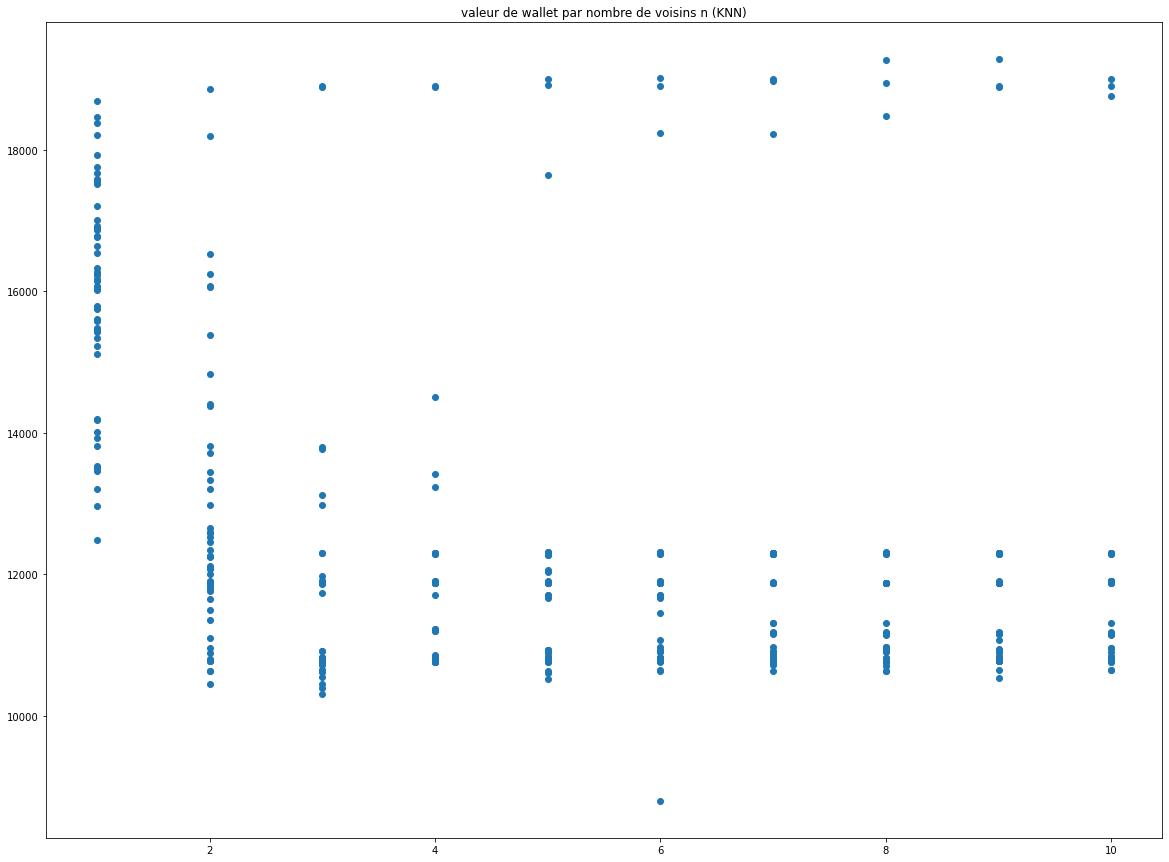

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt   
plt.figure(figsize=(20,15))
plt.title("valeur de wallet par nombre de voisins n (KNN)")
plt.scatter(n_neighbors_knn, wallet_tab_knn) 

In [ ]:
on crée un graph des scores par nombre de voisins n (KNN)"

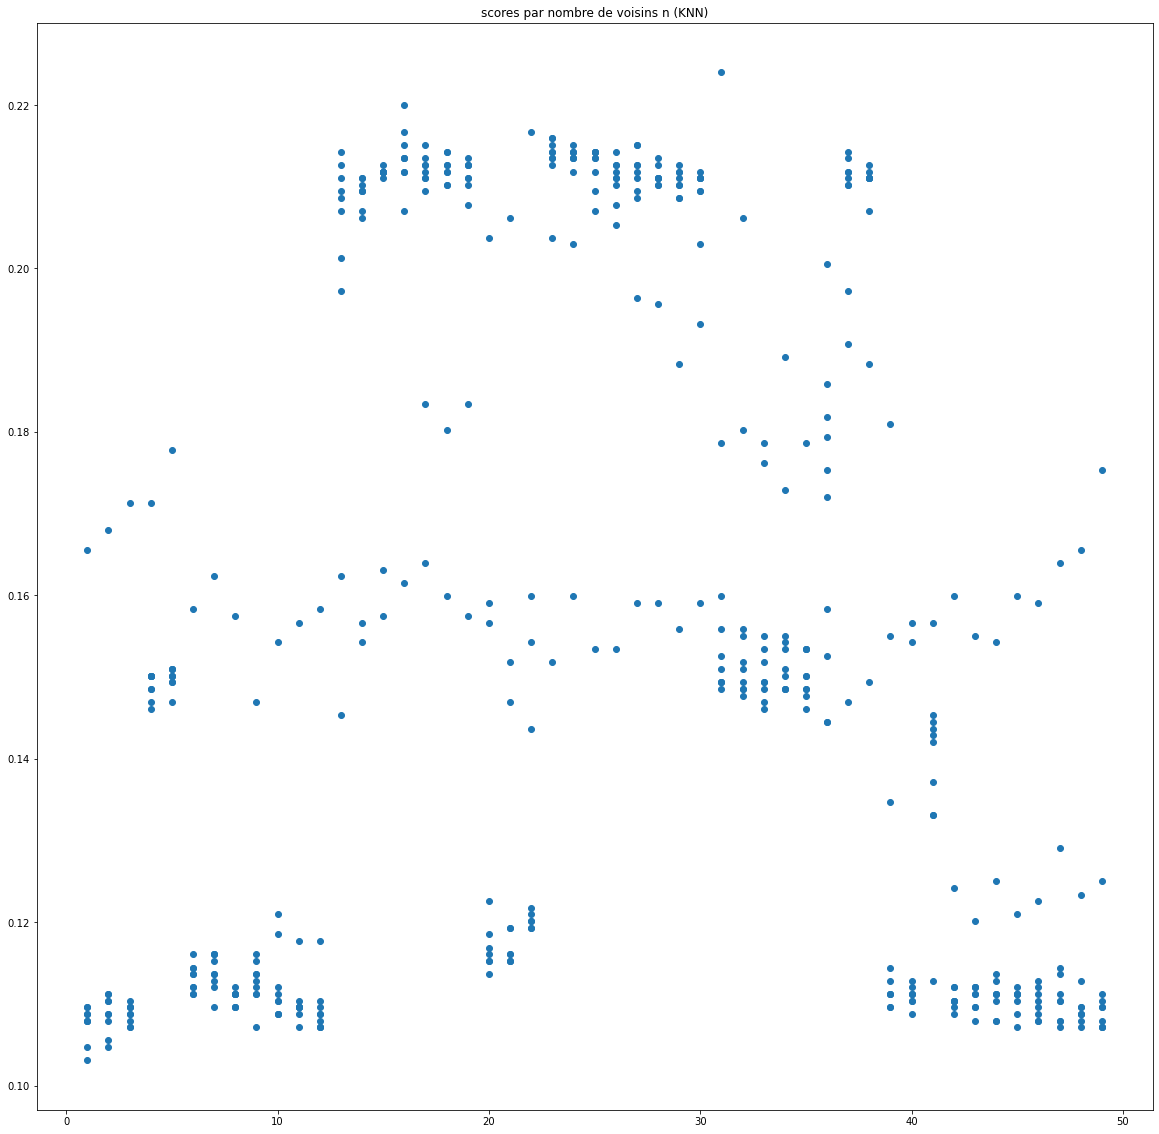

In [87]:
plt.figure(figsize=(20,20))
plt.title("scores par nombre de voisins n (KNN)")

plt.scatter(n_neighbors_knn, scores_tab_knn) 

#scores_pr

In [104]:
def plot_pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    '''Plotting process'''
    plt.figure(figsize=(15,15))

    plt.scatter(Xs,Ys)
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plt.plot(pf_X, pf_Y,c='r',linewidth=2,linestyle='dashed')
    plt.xlabel("scores")
    plt.ylabel("wallet values")
    plt.show()

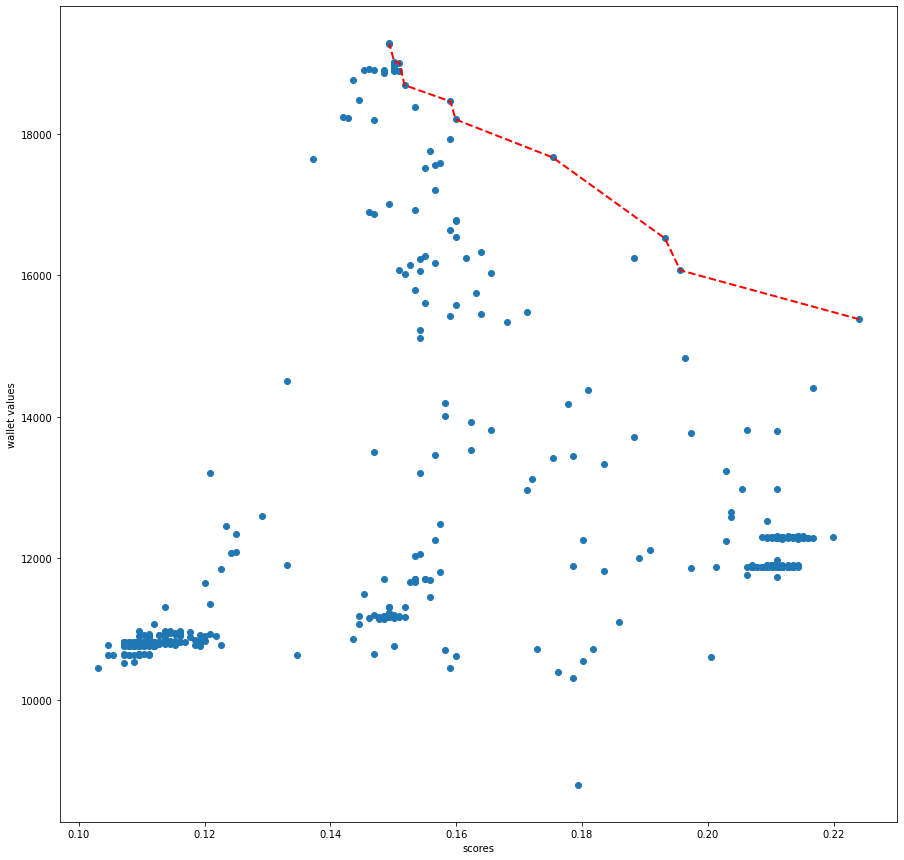

In [105]:
plot_pareto_frontier(scores_tab_knn,wallet_tab_knn)

In [106]:
from sklearn.ensemble import RandomForestClassifier
n_estimators_rf = []
min_samples_leaf_rf=[]
wallet_tab_rf = []
scores_rf = []
for i in range(1,50,1): 

    for j in range(100,1100,100):
        rf = RandomForestClassifier(max_features=None,n_estimators = j,min_samples_leaf=i,n_jobs=-1)
        rf.fit(data_scaled,np.ravel(y_train))
        pred_rf = rf.predict(X_test_scaled)
        wallet = wallet_value(X_test,pred_rf)
        wallet_tab_rf.append(wallet)
        n_estimators_rf.append(j)
        min_samples_leaf_rf.append(i)
        scores_rf.append(rf.score(X_test_scaled,y_test))
        print (" \n pour n= " , j ," min_samples_leaf= ",i,"wallet value = ", wallet,"score =",rf.score(X_test_scaled,y_test))



 
 pour n=  100  min_samples_leaf=  1 wallet value =  14765.927234000075 score = 0.1737012987012987
 
 pour n=  200  min_samples_leaf=  1 wallet value =  16476.27291200004 score = 0.16233766233766234
 
 pour n=  300  min_samples_leaf=  1 wallet value =  16511.687014000043 score = 0.16883116883116883
 
 pour n=  400  min_samples_leaf=  1 wallet value =  15069.488686000048 score = 0.18425324675324675
 
 pour n=  500  min_samples_leaf=  1 wallet value =  14491.805496000028 score = 0.19237012987012986
 
 pour n=  600  min_samples_leaf=  1 wallet value =  16900.228925999985 score = 0.18262987012987014
 
 pour n=  700  min_samples_leaf=  1 wallet value =  16475.941508999953 score = 0.1875
 
 pour n=  800  min_samples_leaf=  1 wallet value =  13479.744664000047 score = 0.18262987012987014
 
 pour n=  900  min_samples_leaf=  1 wallet value =  15663.049188 score = 0.19155844155844157
 
 pour n=  1000  min_samples_leaf=  1 wallet value =  14704.037830000074 score = 0.19237012987012986
 
 pour n=

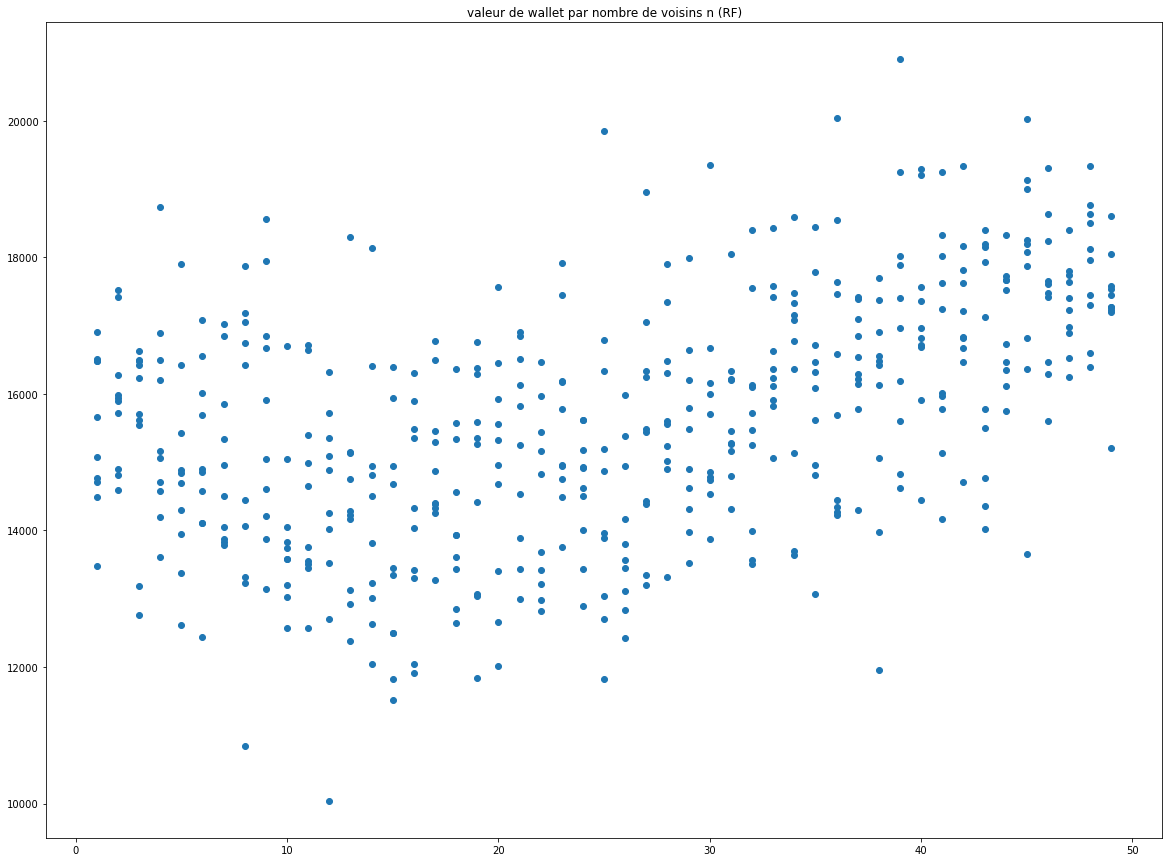

In [109]:
plt.figure(figsize=(20,15))
plt.title("valeur de wallet par nombre de min samples leaf  (RF)")

plt.scatter(min_samples_leaf_rf,wallet_tab_rf) 

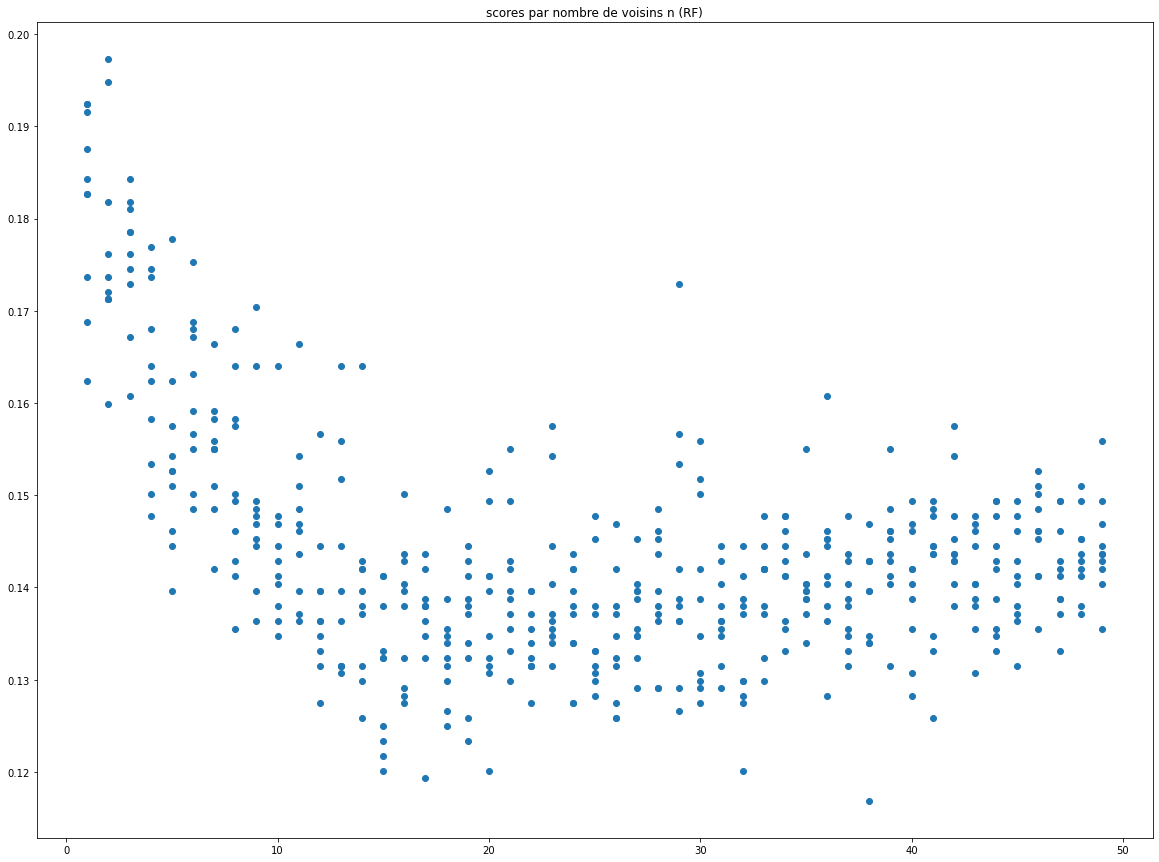

In [110]:
plt.figure(figsize=(20,15))
plt.title("scores par nombre de min samples leaf n (RF)")

plt.scatter(min_samples_leaf_rf,scores_rf) 


In [ ]:
On fait un plot des valeurs de portefeuille par rapport  les scores en montrant les meuilleur valeurs (Ligne de pareto rouge)

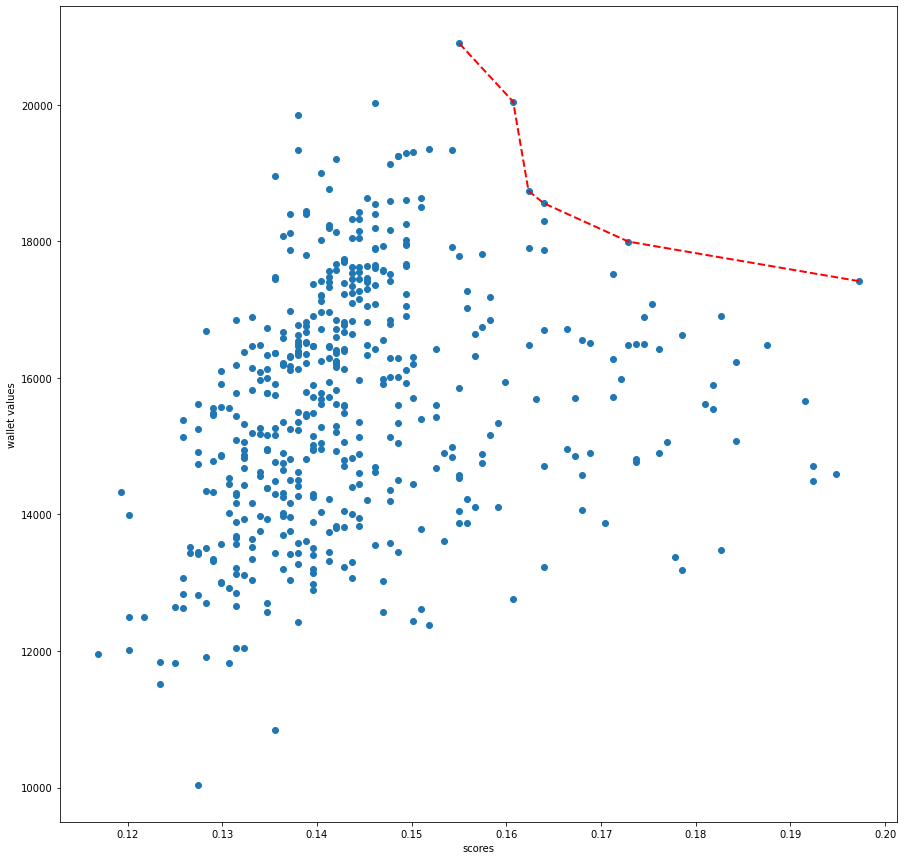

In [113]:
plot_pareto_frontier(scores_rf,wallet_tab_rf)

In [26]:
wallet_value(X_test,y_test.values)


176286.30522799972

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-5)
clf.fit(data_scaled, y_train.values.ravel())

clf.score(X_test_scaled,y_test)

0.20454545454545456

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

clf = Perceptron(tol=1000, random_state=0,alpha=0.00001)

clf.fit(data_scaled,y_train.values.ravel())

clf.score(X_test_scaled,y_test)

#print(classification_report(y_test, clf.predict(X_test_scaled)))

0.1852152721364744

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
clf.fit(data_scaled,y_train.values.ravel())

clf.score(X_test_scaled,y_test)

C:\Users\marou\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.13555194805194806

In [28]:
from sklearn import svm
parametres = {'C':[0.01,0.1,1,10,100],'kernel':['rbf', 'linear','poly'] ,'gamma':[0.001,0.01,0.05, 0.1, 0.5,1]}
param_grid_svc = [{'kernel': ['rbf'], 'C': np.logspace(-4, 4, 9), 'gamma': np.logspace(-4, 0, 4)},
                       {'kernel': ['linear'], 'C': np.logspace(-4, 4, 9)}]
clf=svm.SVC()
grid_clf = model_selection.GridSearchCV(estimator = clf,param_grid=parametres,n_jobs=-1)
grille =grid_clf.fit(data_scaled,np.ravel(y_train))
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']]) 

                                             params  mean_test_score
0      {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}         0.186637
1   {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}         0.146018
2     {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}         0.186637
3       {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}         0.186637
4    {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}         0.146018
..                                              ...              ...
85     {'C': 100, 'gamma': 0.5, 'kernel': 'linear'}         0.134242
86       {'C': 100, 'gamma': 0.5, 'kernel': 'poly'}         0.145210
87          {'C': 100, 'gamma': 1, 'kernel': 'rbf'}         0.181967
88       {'C': 100, 'gamma': 1, 'kernel': 'linear'}         0.134242
89         {'C': 100, 'gamma': 1, 'kernel': 'poly'}         0.145210

[90 rows x 2 columns]


In [120]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = [{'n_estimators': [10,25, 50, 100, 250, 500, 1000],
                        'min_samples_leaf': [5, 10, 15,20,25,30,50],
                        'max_features': ['sqrt', 'log2',None]}]
param_grid_knn = [{'n_neighbors': [1,2, 3, 5, 10, 20, 25,31,50,100],
                        'p': [1,2,3],
                        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}]
param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}
clf_rf=RandomForestClassifier(n_jobs=-1)
clf_knn=KNeighborsClassifier(n_jobs=-1)
clf_lr=LogisticRegression(max_iter=20000)
gridcvs = {}
for pgrid, clf, name in zip((param_grid_lr, param_grid_rf, param_grid_knn),
                            (clf_lr, clf_rf, clf_knn),
                            ('LogisticRegression', 'RF', 'KNN')):
    gcv = GridSearchCV(clf, pgrid, cv=5, refit=True)
    gridcvs[name] = gcv


    

In [121]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True)
outer_scores = {}
for name, gs in gridcvs.items():
    nested_score = cross_val_score(gs, data_scaled, np.ravel(y_train), cv=outer_cv)
    outer_scores[name] = nested_score
    print(f'{name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}')

LogisticRegression: outer accuracy 19.92 +/- 1.03
RF: outer accuracy 20.90 +/- 0.96
KNN: outer accuracy 18.68 +/- 1.47


In [123]:
from sklearn.metrics import accuracy_score

final_clf = gridcvs['LogisticRegression']
final_clf.fit(data_scaled, np.ravel(y_train))

print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_train, y_pred=final_clf.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Best Parameters: {'C': 0.0001, 'solver': 'lbfgs'}
Training Accuracy: 14.22
Test Accuracy: 14.69


X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names


In [ ]:
from sklearn.metrics import accuracy_score

final_clf = gridcvs['RF']
final_clf.fit(data_scaled, np.ravel(y_train))

print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_train, y_pred=final_clf.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

In [41]:
from sklearn.metrics import accuracy_score

final_clf = gridcvs['KNN']
final_clf.fit(data_scaled, np.ravel(y_train))

print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_train, y_pred=final_clf.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 100, 'p': 3}


C:\Users\marou\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\marou\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Training Accuracy: 17.12
Test Accuracy: 14.53


In [20]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=31,p=2,n_jobs=-1)

knn.fit(data_scaled,np.ravel(y_train))
    
pred_knn = knn.predict(X_test_scaled)

print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.29      0.30      0.30       271
           1       0.00      0.00      0.00       127
           2       0.16      0.14      0.15       179
           3       0.21      0.59      0.31       255
           4       0.00      0.00      0.00       225
           5       0.21      0.11      0.14       175

    accuracy                           0.22      1232
   macro avg       0.15      0.19      0.15      1232
weighted avg       0.16      0.22      0.17      1232



In [24]:
import shap
explainer = shap.KernelExplainer(knn.predict_proba, shap.kmeans(data_scaled, 1000))

explainer

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [25]:
shap_values = explainer.shap_values(shap.sample(X_test_scaled, 200))

  0%|          | 0/200 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

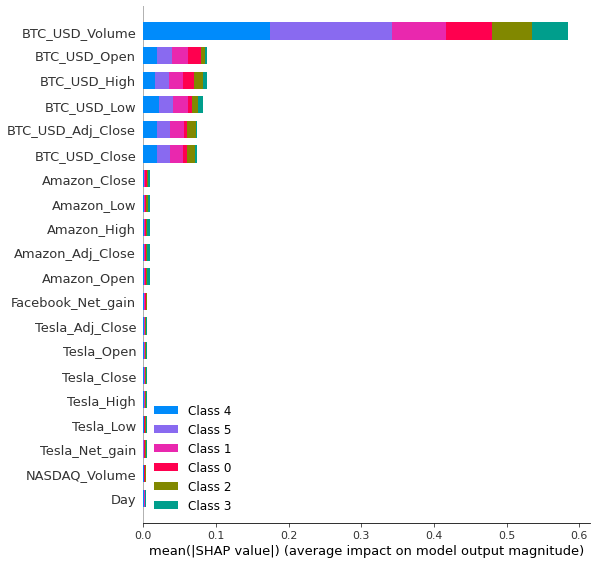

In [40]:
shap.summary_plot(shap_values, X_test)

In [114]:
from sklearn.metrics import classification_report

rf = RandomForestClassifier(max_features=None,n_estimators = 100,min_samples_leaf=39,n_jobs=-1)

rf.fit(data_scaled,np.ravel(y_train))
    
pred_rf = rf.predict(X_test_scaled)

print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.22      0.26      0.24       271
           1       0.11      0.13      0.12       127
           2       0.14      0.53      0.23       179
           3       0.06      0.00      0.01       255
           4       0.18      0.06      0.09       225
           5       0.36      0.02      0.04       175

    accuracy                           0.16      1232
   macro avg       0.18      0.17      0.12      1232
weighted avg       0.18      0.16      0.12      1232



In [116]:
import shap
explainer = shap.TreeExplainer(rf)

explainer

In [ ]:
On affiche les colonnes avec les plus grand impacte sur le modele

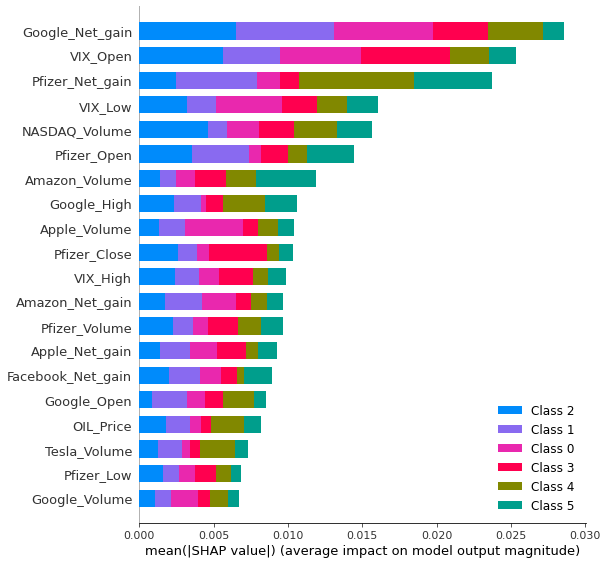

In [119]:
shap.summary_plot(shap_values_rf, X_test)